#   Определение перспективного тарифа для телеком-компании
   

 Провести  анализ тарифов на выборке данных 500 пользователей оператора сотовой связи «Мегалайн» за 2018 год.
 
  Проанализировать поведение клиентов и сделать вывод — какой  из двух ,предлагаемых тарифов «Смарт» или «Ультра» приносит больше выручки компании 


 ##  Описание данных


##### Таблица users (информация о пользователях):


  user_id — уникальный идентификатор пользователя
  
  first_name — имя пользователя
  
  last_name — фамилия пользователя
  
  age — возраст пользователя (годы)
  
  reg_date — дата подключения тарифа (день, месяц, год)
  
  churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
  
  city — город проживания пользователя
  
  tariff — название тарифного плана


##### Таблица calls (информация о звонках):


id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок



##### Таблица messages (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение



##### Таблица internet (информация об интернет-сессиях):
 id — уникальный номер сессии
 
 mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
 
 session_date — дата интернет-сессии
 
 user_id — идентификатор пользователя


##### Таблица tariffs (информация о тарифах):
 tariff_name — название тарифа
 
rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)





Описание тарифов


Тариф «Смарт»
  Ежемесячная плата: 550 рублей
  Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
  Стоимость услуг сверх тарифного пакета:
   минута разговора: 3 рубля
  сообщение: 3 рубля
  1 Гб интернет-трафика: 200 рублей
  
Тариф «Ультра»
  Ежемесячная плата: 1950 рублей
  Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
  Стоимость услуг сверх тарифного пакета:
  минута разговора: 1 рубль
  сообщение: 1 рубль
  1 Гб интернет-трафика: 150 рублей
  
  
Примечание

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону.  

##  Изучение общей информации о данных

In [1]:
# импорт библиотек
import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns
from scipy import stats as st

In [2]:
# открываем файлы
calls = pd.read_csv('/datasets/calls.csv')         
internet = pd.read_csv('/datasets/internet.csv')    
messages = pd.read_csv('/datasets/messages.csv')   
tariffs = pd.read_csv('/datasets/tariffs.csv')   
users = pd.read_csv('/datasets/users.csv')    

In [3]:
# общая информация о звонках и первые 10 строк таблицы:
calls.info()
calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
#  информация об интернет-сессиях
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
#  информация о сообщениях
messages.info()
messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [6]:
#  информация о тарифах
tariffs.info()
tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
# информация о пользователях
users.info()
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [8]:
#подсчет явных дубликатов
display(users.duplicated().sum())

0

In [9]:
#подсчет явных дубликатов
display(tariffs.duplicated().sum())

0

In [10]:
#подсчет явных дубликатов
display(messages.duplicated().sum())

0

In [11]:
#подсчет явных дубликатов
display(internet.duplicated().sum())

0

In [12]:
#подсчет явных дубликатов
display(calls.duplicated().sum())

0

Изучена первая информация о данных:

 Таблица calls - пропуски в данных отсутствуют, типы данных в столбцах call_date и duration не соответствуют представленным данным:

столбец call_date - дата совершения звонка, но  тип данных - object. Нужно перевести в формат даты.
  duration - данные записаны в виде дробных чисел, однако, по условиям тарификации, минута округляется до целого в большую сторону. Нужно  заменить тип данных на целочисленный.
Также присутствуют нулевые значения продолжительности разговора. В приложенной аннотации указано,  что 0 - это несостоявшийся звонок (пропущенный,либо отклоненный). 

 Таблица internet - пропусков в данных нет. Типы данных в столбцах mb_used и session_date не соответствуют представленным данным:

столбец session_date -  дата совершения звонка, но тип данных - object. Нужно перевести в формат даты.
mb_used - данные записаны в виде дробных чисел, однако, по условиям тарификации, значения использованных данных округляются до целого в большую сторону. 
Присутствуют нулевые значения в mb_used. Раз сеанс передачи данных записан, значит он имел место быть. Стоит предположить, что таким образом записываются сессии короче 0.01 мбайта. Такие нулевые значения подлежат замене на значение 1, в соответствии с условиями тарификации.Необходима замена типа данных на целочисленный.

 Таблица messages - пропусков в данных нет. Столбец message_date требует замены типа данных на формат даты
    
 Таблица tariffs -пропусков в данных нет.
 
 Таблица users - пропуски в churn_date(дата прекращения пользования тарифом) В аннотации к проекту сказано,что если значение пропущено, то тариф ещё действовал на момент выгрузки данных). У тех, кто отключился - данные заполнены. reg_date и churn_date требуют замены типа данных на на формат даты. Пропуски в churn_date можно заполнить датой окончания исследования 2018.12.31

{'whiskers': [<matplotlib.lines.Line2D at 0x7f345e6f23a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f345e6f2a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f345e6f2040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f345e681160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f345e6814c0>],
 'means': []}

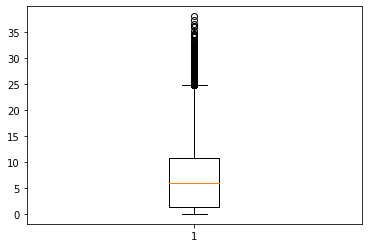

In [13]:
 # звонки

plt.boxplot(x=calls['duration'])

<AxesSubplot:>

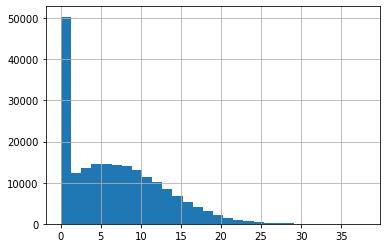

In [14]:
calls['duration'].hist(bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f345e4f1340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f345e4f1a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f345e4e1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f345e4fe100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f345e4fe460>],
 'means': []}

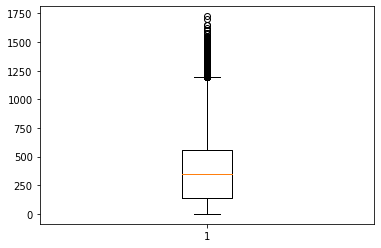

In [15]:
# интернет
plt.boxplot(x=internet['mb_used'])

<AxesSubplot:>

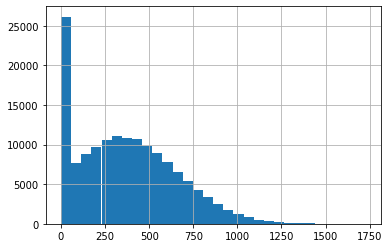

In [16]:
internet['mb_used'].hist(bins=30)

## Предобработка данных 

####  замена типов данных  в таблицах 

In [17]:
#замена типов данных в таблице звонки 
calls['call_date'] = pd.to_datetime(calls['call_date'])
display(calls['call_date'])
calls['duration']=calls['duration'].apply(np.ceil).astype(int)
calls['duration']


0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

In [18]:
#замена типов данных в таблице информация об интернет-сессиях 
internet['session_date'] = pd.to_datetime(internet['session_date'])
display(internet['session_date'])
internet['mb_used']= internet['mb_used'].apply(np.ceil).astype(int)
internet['mb_used']

0        2018-11-25
1        2018-09-07
2        2018-06-25
3        2018-08-22
4        2018-09-24
            ...    
149391   2018-10-03
149392   2018-12-14
149393   2018-10-27
149394   2018-11-26
149395   2018-10-26
Name: session_date, Length: 149396, dtype: datetime64[ns]

0          113
1         1053
2         1198
3          551
4          303
          ... 
149391     319
149392     491
149393       0
149394    1247
149395     545
Name: mb_used, Length: 149396, dtype: int64

In [19]:
#в таблице с интернет-трафиком для дальнейшего анализа переведем мб в гб
internet['gb_used'] = (internet['mb_used'] / 1024)
internet['gb_used']

0         0.110352
1         1.028320
2         1.169922
3         0.538086
4         0.295898
            ...   
149391    0.311523
149392    0.479492
149393    0.000000
149394    1.217773
149395    0.532227
Name: gb_used, Length: 149396, dtype: float64

In [20]:
internet['gb_used'] = internet['gb_used'].apply(np.ceil).replace(0, 1)
internet['gb_used']
internet

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,113,2018-11-25,1000,1.0
1,1,1000_1,1053,2018-09-07,1000,2.0
2,2,1000_2,1198,2018-06-25,1000,2.0
3,3,1000_3,551,2018-08-22,1000,1.0
4,4,1000_4,303,2018-09-24,1000,1.0
...,...,...,...,...,...,...
149391,149391,1499_152,319,2018-10-03,1499,1.0
149392,149392,1499_153,491,2018-12-14,1499,1.0
149393,149393,1499_154,0,2018-10-27,1499,1.0
149394,149394,1499_155,1247,2018-11-26,1499,2.0


In [21]:
#замена типов данных в таблице  messages
messages['message_date'] = pd.to_datetime(messages['message_date'])
display( messages['message_date'])

0        2018-06-27
1        2018-10-08
2        2018-08-04
3        2018-06-16
4        2018-12-05
            ...    
123031   2018-12-12
123032   2018-09-28
123033   2018-09-27
123034   2018-11-15
123035   2018-11-16
Name: message_date, Length: 123036, dtype: datetime64[ns]

In [22]:
#замена типов данных в таблице users 
users['reg_date'] = pd.to_datetime(users['reg_date'])
display(users['reg_date'])

users['churn_date'] = pd.to_datetime(users['churn_date'])
display(users['churn_date'])


0     2018-05-25
1     2018-11-01
2     2018-06-17
3     2018-08-17
4     2018-05-14
         ...    
495   2018-08-28
496   2018-01-27
497   2018-10-09
498   2018-07-19
499   2018-09-27
Name: reg_date, Length: 500, dtype: datetime64[ns]

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

пропуски в churn_date(дата прекращения пользования тарифом) В аннотации к проекту сказано,что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. У тех, кто отключился - данные заполнены. Пропуски в churn_date можно заполнить датой окончания исследования 2018.12.31

####  Подсчет для каждого пользователя по месяцам 

Чтобы произвести расчеты для пользователей по месяцам,сформируем колонки  с месяцем в таблицах:

In [23]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [24]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [25]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet

,Unnamed: 0,id,mb_used,session_date,user_id,gb_used,month
0,0,1000_0,113,2018-11-25,1000,1.0,11
1,1,1000_1,1053,2018-09-07,1000,2.0,9
2,2,1000_2,1198,2018-06-25,1000,2.0,6
3,3,1000_3,551,2018-08-22,1000,1.0,8
4,4,1000_4,303,2018-09-24,1000,1.0,9
...,...,...,...,...,...,...,...
149391,149391,1499_152,319,2018-10-03,1499,1.0,10
149392,149392,1499_153,491,2018-12-14,1499,1.0,12
149393,149393,1499_154,0,2018-10-27,1499,1.0,10
149394,149394,1499_155,1247,2018-11-26,1499,2.0,11


df=calls.merge(messages,on='month', how='left')
df   

In [26]:
#  сводная таблица количества сделанных звонков и израсходованных минут разговора по месяцам:
df_m_calls = calls.pivot_table(index=['user_id','month'],values='duration',aggfunc=('sum','count')).rename(columns={'count':'calls_count','sum':'duration_calls'}).reset_index()

display(df_m_calls.head(10))

,user_id,month,calls_count,duration_calls
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


In [27]:
#  сводная таблица количества отправленных сообщений по месяцам
df_m_messages = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').rename(columns={'id':'messages_count'}).reset_index()

display(df_m_messages.head(10))

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [28]:
# сводная таблица объема израсходованного интернет-трафика по месяцам
df_m_internet = internet.pivot_table(index=['user_id','month'], values=['mb_used','gb_used'], aggfunc='sum').reset_index()

display(df_m_internet.head(10))

,user_id,month,gb_used,mb_used
0,1000,5,5.0,2256
1,1000,6,54.0,23257
2,1000,7,29.0,14016
3,1000,8,29.0,14070
4,1000,9,28.0,14581
5,1000,10,28.0,14717
6,1000,11,28.0,14768
7,1000,12,21.0,9827
8,1001,11,55.0,18452
9,1001,12,41.0,14053


#### Объединенная таблица пользователей по месяцам с  кол-вом звонков , сообщений и интернет трафика 

In [29]:
# объединенная таблица по пльзователям
users_data = pd.merge(df_m_calls, df_m_messages, on=['user_id', 'month'], how='outer')
users_data = pd.merge(users_data, df_m_internet, on=['user_id', 'month'], how='outer')
users_df = pd.merge(users_data, users[['user_id','tariff','churn_date','reg_date','city']], on='user_id', how='left')
users_df.head(10)

,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,tariff,churn_date,reg_date,city
0,1000,5,22.0,159.0,22.0,5.0,2256.0,ultra,NaT,2018-05-25,Краснодар
1,1000,6,43.0,172.0,60.0,54.0,23257.0,ultra,NaT,2018-05-25,Краснодар
2,1000,7,47.0,340.0,75.0,29.0,14016.0,ultra,NaT,2018-05-25,Краснодар
3,1000,8,52.0,408.0,81.0,29.0,14070.0,ultra,NaT,2018-05-25,Краснодар
4,1000,9,58.0,466.0,57.0,28.0,14581.0,ultra,NaT,2018-05-25,Краснодар
5,1000,10,57.0,350.0,73.0,28.0,14717.0,ultra,NaT,2018-05-25,Краснодар
6,1000,11,43.0,338.0,58.0,28.0,14768.0,ultra,NaT,2018-05-25,Краснодар
7,1000,12,46.0,333.0,70.0,21.0,9827.0,ultra,NaT,2018-05-25,Краснодар
8,1001,11,59.0,430.0,NaN,55.0,18452.0,smart,NaT,2018-11-01,Москва
9,1001,12,63.0,414.0,NaN,41.0,14053.0,smart,NaT,2018-11-01,Москва


In [30]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   int64         
 2   calls_count     3174 non-null   float64       
 3   duration_calls  3174 non-null   float64       
 4   messages_count  2717 non-null   float64       
 5   gb_used         3203 non-null   float64       
 6   mb_used         3203 non-null   float64       
 7   tariff          3214 non-null   object        
 8   churn_date      187 non-null    datetime64[ns]
 9   reg_date        3214 non-null   datetime64[ns]
 10  city            3214 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 301.3+ KB


In [31]:
users['user_id'].value_counts()

1024    1
1353    1
1366    1
1365    1
1364    1
       ..
1185    1
1184    1
1183    1
1182    1
1023    1
Name: user_id, Length: 500, dtype: int64

In [32]:
users_df['user_id'].value_counts()

1372    12
1227    12
1135    12
1472    12
1134    12
        ..
1140     1
1434     1
1297     1
1252     1
1445     1
Name: user_id, Length: 498, dtype: int64

In [33]:
users_df['messages_count']= users_df['messages_count'].fillna(value=0)
users_df['churn_date']= users_df['churn_date'].fillna(value=0)
users_df['calls_count']= users_df['calls_count'].fillna(value=0)
users_df['duration_calls']= users_df['duration_calls'].fillna(value=0)
users_df['mb_used']= users_df['mb_used'].fillna(value=0)
users_df['gb_used']= users_df['gb_used'].fillna(value=0)

users_df

,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,tariff,churn_date,reg_date,city
0,1000,5,22.0,159.0,22.0,5.0,2256.0,ultra,0,2018-05-25,Краснодар
1,1000,6,43.0,172.0,60.0,54.0,23257.0,ultra,0,2018-05-25,Краснодар
2,1000,7,47.0,340.0,75.0,29.0,14016.0,ultra,0,2018-05-25,Краснодар
3,1000,8,52.0,408.0,81.0,29.0,14070.0,ultra,0,2018-05-25,Краснодар
4,1000,9,58.0,466.0,57.0,28.0,14581.0,ultra,0,2018-05-25,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,64.0,17232.0,smart,0,2018-08-15,Санкт-Петербург
3210,1489,10,0.0,0.0,21.0,63.0,19588.0,smart,0,2018-08-15,Санкт-Петербург
3211,1489,11,0.0,0.0,20.0,56.0,17516.0,smart,0,2018-08-15,Санкт-Петербург
3212,1489,12,0.0,0.0,35.0,53.0,17341.0,smart,0,2018-08-15,Санкт-Петербург


#### функция для подсчета помесячных затрат каждого пользователя  по тарифам  и довавление столбца затрат 

In [34]:
#функция для подсчета помесячных затрат по тарифам 
def extra_lim(row):
    if row['tariff'] == 'smart':
        if row['messages_count'] > 50:
            messages_extra = (row['messages_count'] - 50)*3
        else:
            messages_extra = 0
        if row['calls_count'] > 500:
            calls_extra = (row['calls_count'] - 500)*3
        else:
            calls_extra = 0
        if row['gb_used'] > 15:
            gb_extra = (row['gb_used'] - 15)*200
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + 550
    if row['tariff'] == 'ultra':
        if row['messages_count'] > 1000:
            messages_extra = (row['messages_count'] - 1000)*1
        else:
            messages_extra = 0
        if row['calls_count'] > 3900:
            calls_extra = (row['calls_count'] - 3000)*1
        else:
            calls_extra = 0
        if row['gb_used'] > 30:
            gb_extra = (row['gb_used'] - 30)*150
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + 1950
    return total_cost
 


In [35]:
# добавление столбца стоимость помесячно 
users_df['total_cost'] = users_df.apply(extra_lim, axis=1)
users_df.head(10)

,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,tariff,churn_date,reg_date,city,total_cost
0,1000,5,22.0,159.0,22.0,5.0,2256.0,ultra,0,2018-05-25,Краснодар,1950.0
1,1000,6,43.0,172.0,60.0,54.0,23257.0,ultra,0,2018-05-25,Краснодар,5550.0
2,1000,7,47.0,340.0,75.0,29.0,14016.0,ultra,0,2018-05-25,Краснодар,1950.0
3,1000,8,52.0,408.0,81.0,29.0,14070.0,ultra,0,2018-05-25,Краснодар,1950.0
4,1000,9,58.0,466.0,57.0,28.0,14581.0,ultra,0,2018-05-25,Краснодар,1950.0
5,1000,10,57.0,350.0,73.0,28.0,14717.0,ultra,0,2018-05-25,Краснодар,1950.0
6,1000,11,43.0,338.0,58.0,28.0,14768.0,ultra,0,2018-05-25,Краснодар,1950.0
7,1000,12,46.0,333.0,70.0,21.0,9827.0,ultra,0,2018-05-25,Краснодар,1950.0
8,1001,11,59.0,430.0,0.0,55.0,18452.0,smart,0,2018-11-01,Москва,8550.0
9,1001,12,63.0,414.0,0.0,41.0,14053.0,smart,0,2018-11-01,Москва,5750.0


## Анализ данных 

#### Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [36]:
# выбор сторок тарифа смарт и создание таблицы с группировкой  потребления по месяцам
smart_df = users_df.query('tariff == "smart"')
smart_df_month= smart_df.pivot_table(index='month',values=['duration_calls','calls_count','messages_count','gb_used','total_cost'])

In [37]:
smart_df.head(10)

,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,tariff,churn_date,reg_date,city,total_cost
8,1001,11,59.0,430.0,0.0,55.0,18452.0,smart,0,2018-11-01,Москва,8550.0
9,1001,12,63.0,414.0,0.0,41.0,14053.0,smart,0,2018-11-01,Москва,5750.0
10,1002,6,15.0,117.0,4.0,34.0,10871.0,smart,0,2018-06-17,Стерлитамак,4350.0
11,1002,7,26.0,214.0,11.0,59.0,17601.0,smart,0,2018-06-17,Стерлитамак,9350.0
12,1002,8,42.0,289.0,13.0,60.0,20347.0,smart,0,2018-06-17,Стерлитамак,9550.0
13,1002,9,36.0,206.0,4.0,56.0,16712.0,smart,0,2018-06-17,Стерлитамак,8750.0
14,1002,10,33.0,212.0,10.0,44.0,13905.0,smart,0,2018-06-17,Стерлитамак,6350.0
15,1002,11,32.0,243.0,16.0,56.0,18610.0,smart,0,2018-06-17,Стерлитамак,8750.0
16,1002,12,33.0,236.0,12.0,62.0,18137.0,smart,0,2018-06-17,Стерлитамак,9950.0
30,1005,1,15.0,95.0,7.0,7.0,2730.0,smart,0,2018-01-25,Набережные Челны,550.0


In [38]:
display(smart_df_month)
smart_df_month.describe()

,calls_count,duration_calls,gb_used,messages_count,total_cost
month,,,,,
1,27.676471,203.852941,25.705882,18.235294,3228.588235
2,40.189655,298.689655,35.706897,24.086207,4955.534483
3,54.324675,390.051948,47.220779,31.857143,7048.155844
4,51.312500,367.133929,42.098214,30.741071,6096.723214
5,55.241135,387.361702,48.758865,33.773050,7421.361702
6,55.548780,395.640244,48.823171,33.402439,7384.085366
7,56.726368,408.353234,49.398010,33.751244,7511.636816
8,58.978723,421.468085,51.438298,33.638298,7889.617021
9,59.546154,428.611538,50.846154,33.638462,7770.130769


,calls_count,duration_calls,gb_used,messages_count,total_cost
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,53.958072,386.760499,46.761938,31.413211,7026.663229
std,10.469205,72.262004,8.507684,5.103413,1564.286820
min,27.676471,203.852941,25.705882,18.235294,3228.588235
25%,53.571631,382.304759,45.940138,31.578125,6810.297687
50%,56.137574,401.996739,49.110590,33.638380,7466.499259
75%,59.650262,426.754925,51.595730,33.767242,7925.023990
max,66.486647,478.560831,56.240356,35.994065,8823.275964


In [39]:
# общая стоимость тарифа в месяц
smart_df_month[['total_cost']].describe()

,total_cost
count,12.000000
mean,7026.663229
std,1564.286820
min,3228.588235
25%,6810.297687
50%,7466.499259
75%,7925.023990
max,8823.275964


In [40]:
# общая продолжительность звонков тарифа в месяц
smart_df_month[['duration_calls']].describe()

,duration_calls
count,12.000000
mean,386.760499
std,72.262004
min,203.852941
25%,382.304759
50%,401.996739
75%,426.754925
max,478.560831


In [41]:
# общее кол-во смс пользователей тарифа в месяц
smart_df_month[['messages_count']].describe()

,messages_count
count,12.000000
mean,31.413211
std,5.103413
min,18.235294
25%,31.578125
50%,33.638380
75%,33.767242
max,35.994065


In [42]:
# общее кол-во ГБ интернета тарифа в месяц
smart_df_month[['gb_used']].describe()

,gb_used
count,12.000000
mean,46.761938
std,8.507684
min,25.705882
25%,45.940138
50%,49.110590
75%,51.595730
max,56.240356


In [43]:
# выбор сторок тарифа ультра и создание таблицы с группировкой  потребления по месяцам
ultra_df = users_df.query('tariff == "ultra"')
ultra_df_month= ultra_df.pivot_table(index='month',values=['duration_calls','calls_count','messages_count','gb_used','total_cost'])

In [44]:
display(ultra_df.head(10))
ultra_df.describe()

,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,tariff,churn_date,reg_date,city,total_cost
0,1000,5,22.0,159.0,22.0,5.0,2256.0,ultra,0,2018-05-25,Краснодар,1950.0
1,1000,6,43.0,172.0,60.0,54.0,23257.0,ultra,0,2018-05-25,Краснодар,5550.0
2,1000,7,47.0,340.0,75.0,29.0,14016.0,ultra,0,2018-05-25,Краснодар,1950.0
3,1000,8,52.0,408.0,81.0,29.0,14070.0,ultra,0,2018-05-25,Краснодар,1950.0
4,1000,9,58.0,466.0,57.0,28.0,14581.0,ultra,0,2018-05-25,Краснодар,1950.0
5,1000,10,57.0,350.0,73.0,28.0,14717.0,ultra,0,2018-05-25,Краснодар,1950.0
6,1000,11,43.0,338.0,58.0,28.0,14768.0,ultra,0,2018-05-25,Краснодар,1950.0
7,1000,12,46.0,333.0,70.0,21.0,9827.0,ultra,0,2018-05-25,Краснодар,1950.0
17,1003,8,55.0,380.0,37.0,15.0,8571.0,ultra,0,2018-08-17,Москва,1950.0
18,1003,9,134.0,961.0,91.0,23.0,12479.0,ultra,0,2018-08-17,Москва,1950.0


,user_id,month,calls_count,duration_calls,messages_count,gb_used,mb_used,total_cost
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,49.363452,39.966497,19486.901523,4070.406091
std,140.694908,2.871762,43.916853,317.606098,47.804457,20.407980,10096.317202,2323.808559
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,6.000000,24.000000,11785.000000,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,38.000000,40.000000,19324.000000,3450.000000
75%,1381.000000,11.000000,104.000000,752.000000,79.000000,54.000000,26863.000000,5550.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,100.000000,49789.000000,12450.000000


In [45]:
display(ultra_df_month)
ultra_df_month.describe()

,calls_count,duration_calls,gb_used,messages_count,total_cost
month,,,,,
1,59.444444,428.111111,28.333333,33.777778,2650.000000
2,41.541667,297.125000,25.291667,21.958333,3050.000000
3,67.675676,489.648649,35.783784,32.297297,3916.216216
4,64.090909,458.018182,34.654545,31.563636,3553.636364
5,72.507463,510.328358,40.164179,37.850746,4052.238806
6,66.738095,479.702381,38.726190,41.726190,3896.428571
7,75.780220,545.791209,42.230769,49.846154,4232.967033
8,71.289720,510.775701,39.925234,48.439252,4096.261682
9,74.600000,539.443478,39.521739,52.286957,3996.521739


,calls_count,duration_calls,gb_used,messages_count,total_cost
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,69.123177,495.934310,37.560332,43.714983,3851.752960
std,10.801795,77.450072,5.696430,12.320470,532.531077
min,41.541667,297.125000,25.291667,21.958333,2650.000000
25%,66.076299,474.281331,35.501474,33.407658,3810.730519
50%,71.898591,510.552030,39.723486,45.082721,4024.380273
75%,75.284607,542.483250,40.684095,53.162979,4094.492250
max,83.316547,592.805755,44.654676,60.611511,4599.280576


In [46]:
# доля переплачивающих сверх тарифа 
part_paied_extra_smart =len(smart_df.query('total_cost > 550')) / len(smart_df['total_cost'])
display(part_paied_extra_smart)
part_paied_extra_ultra =len(ultra_df.query('total_cost> 1950')) / len(ultra_df)
display(part_paied_extra_ultra)

0.9587258860475549

0.6639593908629442

#### число значений и доля каждого тарифа в выборке 

In [82]:
# число значений и доля в выборке тарифа " смарт"
count_smart=users_df.query('tariff == "smart"')['tariff'].count()
part_smart=count_smart/users_df['tariff'].count()*100
display(count_smart)
part_smart.round(2)

2229

69.35

In [83]:
# число значений и доля в выборке тарифа "Ультра"
count_ultra=users_df.query('tariff == "ultra"')['tariff'].count()
part_ultra=count_ultra/users_df['tariff'].count()*100
display(count_ultra)
part_ultra.round(2)

985

30.65

#### подсчет для тарифа "Смарт"( дисперсия и стандартное отклонение) 

In [49]:
# дисперсия общей стоимости затрат пользователей тарифа
smart_var_cost = np.var(smart_df[['total_cost']])
smart_var_cost

total_cost    1.136663e+07
dtype: float64

In [50]:
# стандартное отклонение  общей стоимости затрат пользователей тарифа
smart_dev_cost = np.std(smart_df[['total_cost']])
smart_dev_cost 

total_cost    3371.443344
dtype: float64

In [51]:
# дисперсия минут разговора пользователей тарифа
smart_var_duration = np.var(smart_df[['duration_calls']])
smart_var_duration

duration_calls    36203.066652
dtype: float64

In [52]:
# стандартное отклонение минут разговора пользователей тарифа
smart_dev_duration = np.std(smart_df[['duration_calls']])
smart_dev_duration 

duration_calls    190.271035
dtype: float64

In [53]:
# дисперсия кол-ва сообщений пользователей тарифа
smart_var_messages_count = np.var(smart_df[['messages_count']])
smart_var_messages_count

messages_count    796.455483
dtype: float64

In [54]:
# стандартное отклонение кол-ва сообщений пользователей тарифа
smart_dev_messages_count= np.std(smart_df[['messages_count']])
smart_dev_messages_count

messages_count    28.221543
dtype: float64

In [55]:
# дисперсия кол-ва потребленного (гигабайт )трафика пользователей тарифа
smart_var_gb_used = np.var(smart_df[['gb_used']])
smart_var_gb_used

gb_used    306.031762
dtype: float64

In [56]:
# стандартное отклонение  потребленного (гигабайт )трафика  пользователей тарифа
smart_dev_messages_count= np.std(smart_df_month[['gb_used']])
smart_dev_messages_count

gb_used    8.145488
dtype: float64

####  Гистограммы для тарифа "Смарт"

Text(0.5, 1.0, 'Общая стоимость для абонентов ')

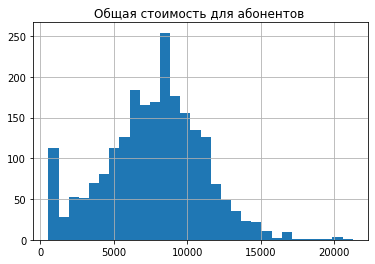

In [57]:
smart_df.hist(column='total_cost', bins=30)
plt.title('Общая стоимость для абонентов ')

Text(0.5, 1.0, 'Использованные минуты разговора')

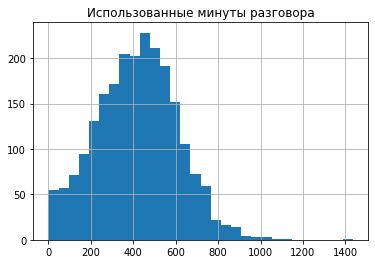

In [58]:
smart_df.hist(column='duration_calls', bins=30)
plt.title('Использованные минуты разговора')

Text(0.5, 1.0, 'Колличество сообщений')

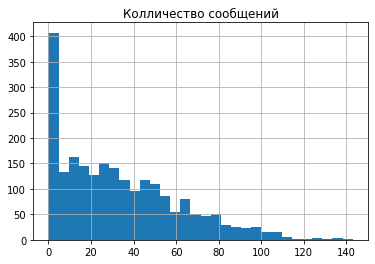

In [59]:
smart_df.hist(column='messages_count', bins=30)
plt.title('Колличество сообщений')

Text(0.5, 1.0, 'Колличество потребленного трафика в гигабайт')

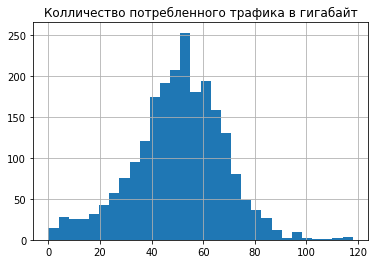

In [60]:
smart_df.hist(column='gb_used', bins=30)
plt.title('Колличество потребленного трафика в гигабайт')

#### подсчет для тарифа "Ультра"( дисперсия и стандартное отклонение) 

In [61]:
# дисперсия общей стоимости затрат пользователей тарифа
ultra_var_cost = np.var(ultra_df[['total_cost']])
ultra_var_cost

total_cost    5.394604e+06
dtype: float64

In [62]:
# стандартное отклонение  общей стоимости затрат пользователей тарифа
ultra_dev_cost = np.std(ultra_df[['total_cost']])
ultra_dev_cost 

total_cost    2322.628661
dtype: float64

In [63]:
# дисперсия минут разговора пользователей тарифа
ultra_var_duration = np.var(ultra_df[['duration_calls']])
ultra_var_duration

duration_calls    100771.223617
dtype: float64

In [64]:
# стандартное отклонение минут разговора пользователей тарифа
ultra_dev_duration = np.std(ultra_df[['duration_calls']])
ultra_dev_duration 

duration_calls    317.444836
dtype: float64

In [65]:
# дисперсия кол-ва сообщений пользователей тарифа
ultra_var_messages_count = np.var(ultra_df[['messages_count']])
ultra_var_messages_count

messages_count    2282.946075
dtype: float64

In [66]:
# стандартное отклонение кол-ва сообщений пользователей тарифа
ultra_dev_messages_count= np.std(ultra_df[['messages_count']])
ultra_dev_messages_count

messages_count    47.780185
dtype: float64

In [67]:
# дисперсия кол-ва потребленного (гигабайт )трафика пользователей тарифа
ultra_var_gb_used = np.var(ultra_df[['gb_used']])
ultra_var_gb_used

gb_used    416.062837
dtype: float64

In [68]:
# стандартное отклонение  потребленного (гигабайт )трафика  пользователей тарифа
ultra_dev_messages_count= np.std(ultra_df[['gb_used']])
ultra_dev_messages_count

gb_used    20.397618
dtype: float64

####  Гистограммы для тарифа "Ультра" 

Text(0.5, 1.0, 'Общая стоимость для абонентов ')

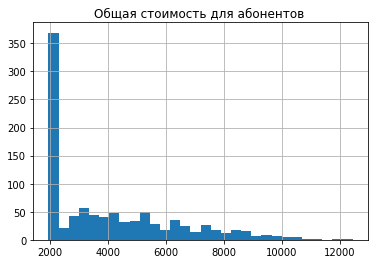

In [69]:
ultra_df.hist(column='total_cost', bins=30)
plt.title('Общая стоимость для абонентов ')

Text(0.5, 1.0, 'Использованные минуты разговора')

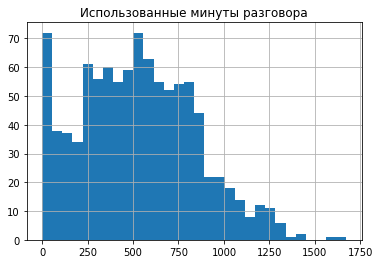

In [70]:
ultra_df.hist(column='duration_calls', bins=30)
plt.title('Использованные минуты разговора')

Text(0.5, 1.0, 'Колличество сообщений')

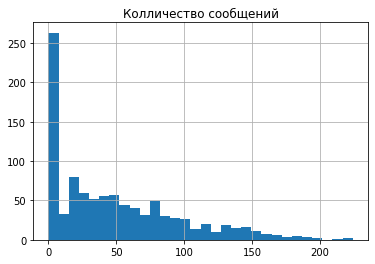

In [71]:
ultra_df.hist(column='messages_count', bins=30)
plt.title('Колличество сообщений')

Text(0.5, 1.0, 'Колличество потребленного трафика в гигабайт')

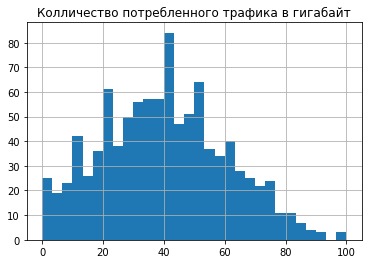

In [72]:
ultra_df.hist(column='gb_used', bins=30)
plt.title('Колличество потребленного трафика в гигабайт')

### Выводы

   Данные в выборке распределены неравномерно, почти70% данных это пользователи тарифа " Смарт.
   Пользователи тарифа "Смарт" совершают 59 звонков в месяц общей длительностьюболее 400 минут, отправляют 32смс и используют почти 46 Гб трафика. Из анализа гистограмм видно,что чуть больше, чем половине пользователей хватает месячного пакета звонков, почти всем хватает смс, а интернет трафика не хватает более чем половине пользователей Почти  96 % пользователей тарифа"Смарт" вынуждены оплачивать услуги сверх пакета.  
  
  
Пользователи тарифа "Ультра"совершают 70 звонков в месяц, общей длительностью около 500 минут, отправляют 44смс и используют около 38 Гб  интернет трафика.Таким образом пользователям тарифа хватает кол-ва минут и смс , включенных в трафик, доплачивается дополнительно абонентами  интернет трафик сверх тарифа.  Средний трафик пользователей Ультра на 25% больше, чем включенные в абонентскую плату 30Гб. 




<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V3:</b> Отлично!


####  Гистограммы  совмещенные  

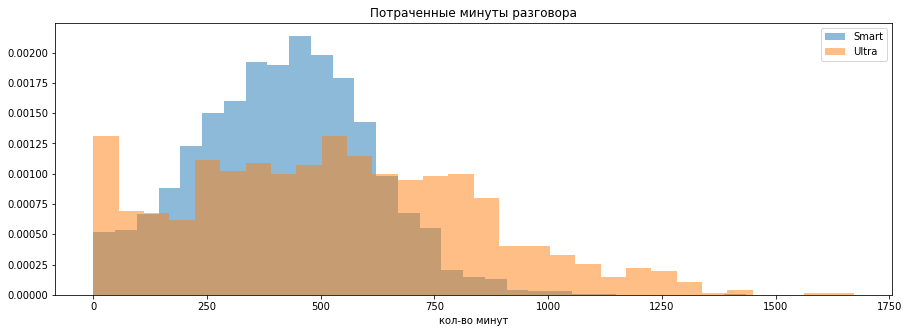

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart_df['duration_calls'],  30, alpha=0.5, label='Smart', density=True)
ax.hist(ultra_df['duration_calls'],30, alpha=0.5, label='Ultra', density=True)
plt.title('Потраченные минуты разговора')
plt.xlabel('кол-во минут')

plt.legend(loc='upper right')
plt.show()  

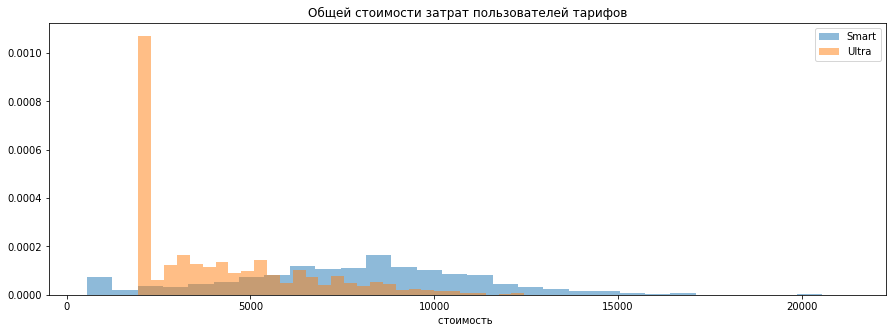

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart_df['total_cost'],  30, alpha=0.5, label='Smart', density=True)
ax.hist(ultra_df['total_cost'],30, alpha=0.5, label='Ultra', density=True)
plt.title('Общей стоимости затрат пользователей тарифов')
plt.xlabel('стоимость ')

plt.legend(loc='upper right')
plt.show() 

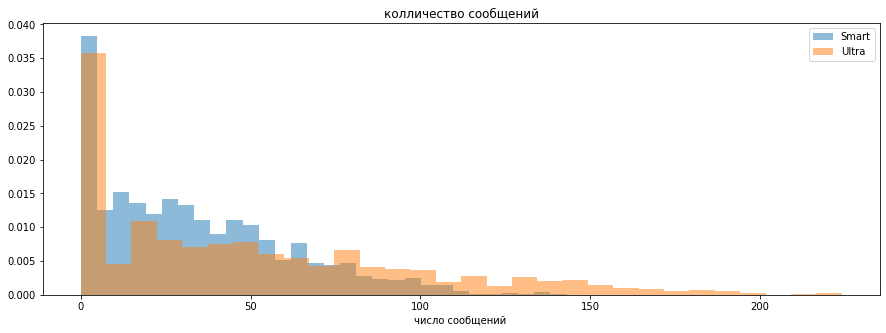

In [75]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart_df['messages_count'],  30, alpha=0.5, label='Smart', density=True)
ax.hist(ultra_df['messages_count'],30, alpha=0.5, label='Ultra', density=True)
plt.title('колличество сообщений')
plt.xlabel('число сообщений ')

plt.legend(loc='upper right')
plt.show() 

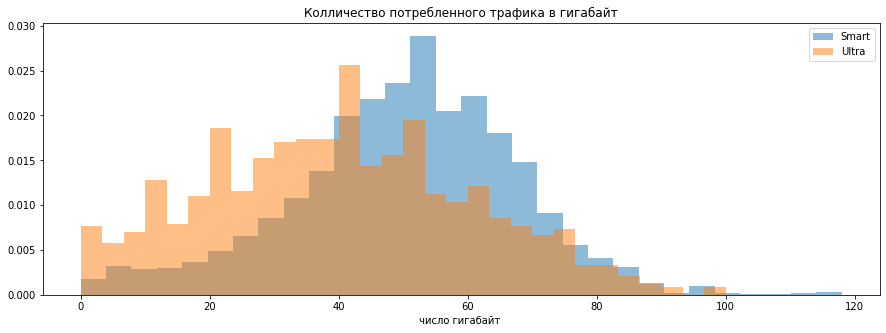

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(smart_df['gb_used'],  30, alpha=0.5, label='Smart', density=True)
ax.hist(ultra_df['gb_used'],30, alpha=0.5, label='Ultra', density=True)
plt.title('Колличество потребленного трафика в гигабайт')
plt.xlabel('число гигабайт ')

plt.legend(loc='upper right')
plt.show() 

####  Выводы совмещенных гистограм 

  По  совмещенным гистограммам видно, что распределение  по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям.

  В целом  распределение продолжительности звонков тарифа  "Ультра " более широкое , но  практически у  большинства пользователей не достигает и половины тарифа." Смарт" общая длительность звонков более чем у половины пользователей превышает минуты включенные в пакет
   Общее количество  сообщений пользователей "Ультра" не достигает и 25% от включенных в  пакет.Лишь немногие используют более 200 сообщений.Общее количество сообщений пользователей "Смарт" может даже в два раза превысить объем, включенный в пакет, но 75% пользователей пакета хватает. Среднее количество сообщений и отклонение больше у "Ультра"
   
   Объем интернет трафика тарифа Ультра 38 ГБ,что превышает включенные в пакет Гб на 25%.Общее количество трафика пользователей "Смарт" 46 гб, что более чем вдвое  превышает включенные в пакет.
   
   Т.к. почти все затраты , кроме интернета у пользователей "Ультра" укладываются в  тарифный пакет ,то большинство пользователей оплачивают только абонентскую плату, пользователи "Смарт" переплачивают гораздо чаще, менее 5% пользователей в  используют только включенные в абонентскую плату услуги
    
    
  

## Проверка гипотез

#### средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

     Н0: "средняя выручка одинаковая вне зависимости от тарифа". 
     
     H1: "Средняя выручка отличается"
     
     Значение критического уровня вероятности (альфа) = 5%.(.05)

In [77]:
# проверим на средних данных по пользователям
alpha = .05 
results = st.ttest_ind(smart_df['total_cost'], ultra_df['total_cost'])

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 2.2791164547734734e-182
Отвергаем нулевую гипотезу


In [78]:
# проверим на данных по  месячным тратам пользователей
alpha =.05 
results = st.ttest_ind(smart_df_month['total_cost'], ultra_df_month['total_cost'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0835907967902177e-06
Отвергаем нулевую гипотезу


 На основании принятого нами уровня статистической значимости 5% отвергаем данную гипотезу
    

####  "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".
  H0 - выручка в разных городах равна. 
  
  H1 - выручка имеет различия. 
  
  Значение критического уровня вероятности (альфа) = 5%.(.05)
  

In [79]:
alpha = 0.05 
results = st.ttest_ind(users_df.query('city == "Москва"')['total_cost'], 
                       users_df.query('city != "Москва"')['total_cost'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.1855356246199162
Не получилось отвергнуть нулевую гипотезу



  Выручка в столице и регионах не отличается статистически значимо.

### Oбщий вывод 


  Проведен анализ тарифов на выборке данных 500 пользователей оператора сотовой связи «Мегалайн» за 2018 год для определения       более прибыльного тарифа и коррекции распределения рекламного бюджета. 
  Для каждого пользователя потарифно определено:
  - количество сделанных звонков и израсходованных минут разговора по месяцам;
  - количество отправленных сообщений по месяцам;
  - объем израсходованного интернет-трафика по месяцам;
  - помесячную выручку с каждого пользователя
  Проведен анализ статистических параметров  данных, посчитано  среднее количество, дисперсия и стандартное отклонение 
  Отдельно проводилась провека  двух гипотез
  
  
   Выявлено:
   
  -Данные в выборке распределены неравномерно, почти70% данных это пользователи тарифа " Смарт.
  
  -Пользователи тарифа "Смарт" совершают 59 звонков в месяц общей длительностью около 400 минут, отправляют 32смс и используют почти 46 Гб трафика. Почти 96 % пользователей тарифа"Смарт" вынуждены оплачивать услуги сверх пакета.

 -Пользователи тарифа "Ультра"совершают 70 звонков в месяц, общей длительностью около 500 минут, отправляют 44смс и используют около 38 Гб интернет трафика.Таким образом пользователям тарифа хватает кол-ва минут и смс , включенных в трафик, доплачивается дополнительно абонентами интернет трафик сверх тарифа. Средний трафик пользователей Ультра на 25% больше, чем включенные в абонентскую плату 30Гб.
 -Пользователи тарифа Ультра расходуют гораздо меньше услуг, чем включено в пакеты, но платят за них, в то время как пользователи "Смарт" чаще используют пакеты полностью
 -По совмещенным гистограммам видно, что распределение  по тарифу "Смарт" меньше, чем у пользователей с тарифом "Ультра" по всем показателям.
 -Медианное и среднее значение дохода у абонентов тарифа ultra выше
 Проверка гипотез показала:
 -средние выручки по тарифам  значимо различаются
 -средняя выручка пользователей из Москвы  не отличается от выручки пользователей из других регионов.
 
При планировании рекламного бюджета целесообразно перераспределить средства в пользу тарифа "Ультра", проведение рекламных компаний целесообразно планировать в общем для всей территории охвата мобильного оператора 

 Для более точной оценки выгоды для мобильного оператора нужно учесть себестоимость минуты, сообщения и мегабайта трафика 

